In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', 300)

In [59]:
beer=pd.read_csv('../data/processed/clean_limited.csv',index_col=0)
beer.head()

,Name,Style,StyleID,ABV,IBU,Color,Simple_style,Style_color,Style_ibu
0,Vanilla Cream Ale,Cream Ale,45,5.48,17.65,4.83,Pale Lager/Blonde Ale,1,1
1,Zombie Dust Clone - EXTRACT,American IPA,7,5.91,59.25,8.98,Pale Ale,2,5
2,Zombie Dust Clone - ALL GRAIN,American IPA,7,5.80,54.48,8.50,Pale Ale,2,5
3,Bakke Brygg Belgisk Blonde 50 l,Belgian Blond Ale,20,6.48,17.84,4.57,Pale Lager/Blonde Ale,1,1
4,Sierra Nevada Pale Ale Clone,American Pale Ale,10,5.58,40.12,8.00,Pale Ale,2,5


In [60]:
X=beer[['ABV','IBU','Color']]

#First experiment with color code
yc=beer['Style_color']

TRIED SCALING THE DATA

In [63]:
from sklearn.preprocessing import MinMaxScaler #ADDED NAN TO THE DF
scaler=MinMaxScaler()

In [64]:
X_scaled=X.copy()
col_toscale=['ABV', 'IBU', 'Color']

In [65]:
# df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
X_scaled[col_toscale] = scaler.fit_transform(X[col_toscale])

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,yc,test_size=0.25,random_state=42)

In [69]:
y_test.value_counts()

Style_color
2    6086
5    1682
1    1308
0     852
3     623
4     407
Name: count, dtype: int64

In [75]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)
y_train_df = pd.DataFrame(y_train, columns=['Style_color'])
train = pd.concat([X_train_df, y_train_df], axis=1)

In [84]:
# train

In [77]:
X_test_df = pd.DataFrame(X_test, columns=X.columns)
y_test_df = pd.DataFrame(y_test, columns=['Style_color'])
test= pd.concat([X_test_df, y_test_df], axis=1)

SAVE TO CSV TRAIN/TEST

In [82]:
train.to_csv('../data/train/train.csv')
test.to_csv('../data/test/test.csv')

In [83]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [85]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(max_iter=100000)

In [86]:
lr1.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=100000)

In [87]:
predictions = lr1.predict(X_test)
predicions_proba = lr1.predict_proba(X)
predicions_proba

array([[4.04515131e-217, 2.53448459e-153, 9.09799818e-002,
        9.09020018e-001, 1.22335203e-061, 5.71171004e-022],
       [0.00000000e+000, 0.00000000e+000, 1.00000000e+000,
        1.63224854e-134, 1.17885999e-219, 3.76560683e-145],
       [0.00000000e+000, 0.00000000e+000, 1.00000000e+000,
        1.27395509e-119, 2.65477267e-201, 5.60265792e-131],
       ...,
       [0.00000000e+000, 0.00000000e+000, 1.00000000e+000,
        7.91872132e-106, 2.26183748e-204, 2.20332364e-148],
       [0.00000000e+000, 1.48219694e-321, 1.00000000e+000,
        6.42100532e-069, 3.33091794e-146, 1.51346443e-087],
       [0.00000000e+000, 0.00000000e+000, 1.00000000e+000,
        5.46165335e-122, 9.74630899e-214, 1.07495097e-139]])

With MinMaxScaler and Style_color

In [88]:
from sklearn.metrics import multilabel_confusion_matrix, precision_score, recall_score, f1_score, accuracy_score,confusion_matrix
print('accuracy_score',accuracy_score(y_test, predictions))
print('precision_score',precision_score(y_test, predictions, average='weighted'))
print('f1_score',f1_score(y_test, predictions, average='weighted'))
print('recall_score',recall_score(y_test, predictions, average='weighted'))

accuracy_score 0.7487680233619274
precision_score 0.831565938753826
f1_score 0.7728652732364605
recall_score 0.7487680233619274


In [89]:
cm=multilabel_confusion_matrix(y_test, predictions)
cm

array([[[9672,  434],
        [ 247,  605]],

       [[8534, 1116],
        [ 425,  883]],

       [[4785,   87],
        [1517, 4569]],

       [[9823,  512],
        [ 196,  427]],

       [[9991,  560],
        [  71,  336]],

       [[9232,   44],
        [ 297, 1385]]], dtype=int64)

In [99]:
cm = confusion_matrix(y_test, predictions,normalize='true')
# print(cm)

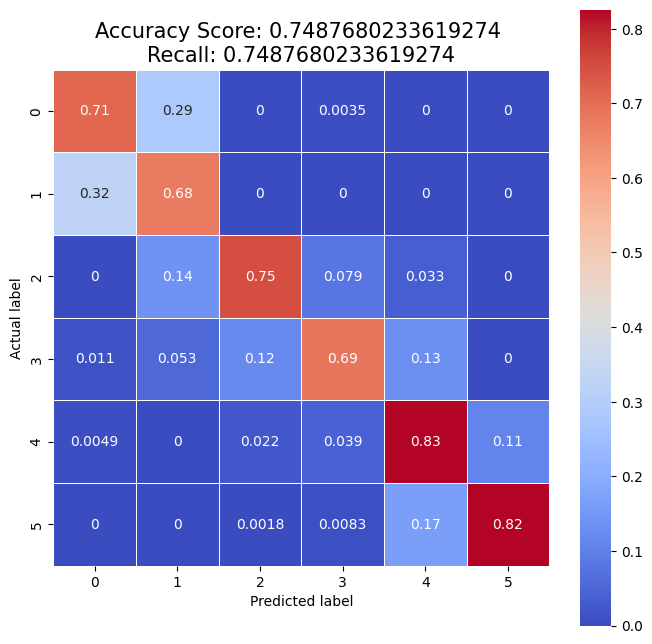

In [105]:
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'coolwarm')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'Accuracy Score: {accuracy_score(y_test, predictions)} \nRecall: {recall_score(y_test, predictions, average="weighted")}'
plt.title(all_sample_title, size = 15);

In [93]:
import pickle

In [95]:
with open('../models/lr1', 'wb') as output:
    pickle.dump(lr1, output)

In [98]:
# with open('../models/lr1', 'rb') as input:
#     modelo_importado = pickle.load(input) 

Let's try with the IBU style and with the standard scaler now

In [106]:
#Second experiment with ibu code
X=beer[['ABV','IBU','Color']]

yi=beer['Style_ibu']

In [108]:
from sklearn.preprocessing import StandardScaler
scalers = StandardScaler()

In [109]:
X_scaleds=X.copy()
col_toscale=['ABV', 'IBU', 'Color']

X_scaleds[col_toscale] = scalers.fit_transform(X[col_toscale])

In [110]:
from sklearn.model_selection import train_test_split
X_trains,X_tests,y_trains,y_tests=train_test_split(X_scaleds,yi,test_size=0.25,random_state=42)
y_tests.value_counts()

Style_ibu
5    6086
4    1682
1    1308
0     852
3     623
2     407
Name: count, dtype: int64

In [111]:
rus = RandomUnderSampler(random_state=42)

X_resampleds, y_resampleds = rus.fit_resample(X_trains, y_trains)

In [112]:
lr2 = LogisticRegression(max_iter=100000)
lr2.fit(X_resampleds, y_resampleds)

LogisticRegression(max_iter=100000)

In [114]:
predictionsS = lr2.predict(X_tests)
predicions_probas = lr2.predict_proba(X)
predicions_probas

array([[1.33224606e-098, 1.36452705e-083, 1.51088312e-006,
        7.48133740e-014, 9.99998489e-001, 1.96904373e-014],
       [2.12228903e-272, 3.03909440e-211, 6.03698388e-012,
        2.29699961e-040, 1.00000000e+000, 2.68630136e-021],
       [1.97108179e-252, 1.48335640e-196, 2.62197480e-011,
        2.26246672e-037, 1.00000000e+000, 1.70866686e-020],
       ...,
       [1.40139434e-210, 2.69997777e-156, 9.81474073e-007,
        3.25388704e-024, 9.99997819e-001, 1.19978434e-006],
       [2.11775823e-190, 7.98246142e-151, 2.24424743e-009,
        2.01101493e-027, 9.99999998e-001, 9.42146611e-018],
       [1.04577770e-262, 7.49420860e-204, 1.19100347e-011,
        5.31169464e-038, 1.00000000e+000, 2.00023502e-020]])

In [115]:
print('accuracy_score',accuracy_score(y_tests, predictionsS))
print('precision_score',precision_score(y_test, predictionsS, average='weighted'))
print('f1_score',f1_score(y_test, predictionsS, average='weighted'))
print('recall_score',recall_score(y_test, predictionsS, average='weighted'))

accuracy_score 0.7926628946888118
precision_score 0.26851998536974786
f1_score 0.19200168102979367
recall_score 0.20268297134513596


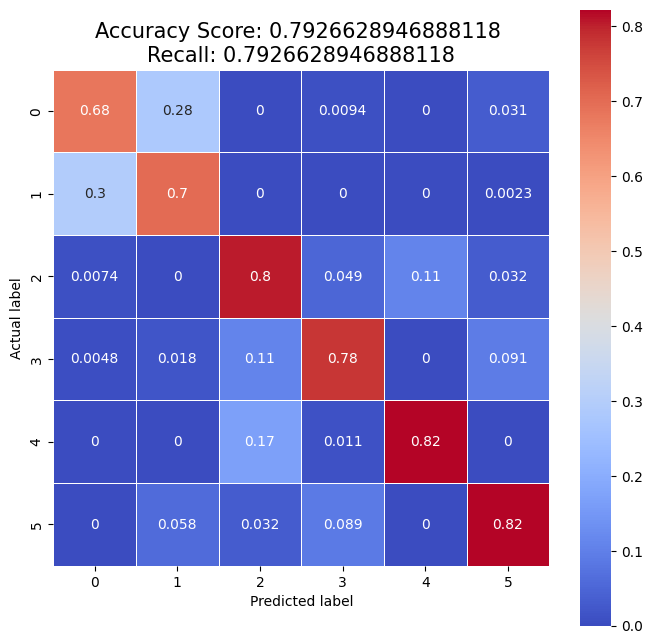

In [116]:
cms = confusion_matrix(y_tests, predictionsS,normalize='true')
# print(cm)
plt.figure(figsize=(8,8))
sns.heatmap(cms, annot=True, linewidths=.5, square = True, cmap = 'coolwarm')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'Accuracy Score: {accuracy_score(y_tests, predictionsS)} \nRecall: {recall_score(y_tests, predictionsS, average="weighted")}'
plt.title(all_sample_title, size = 15);
#TICKS SERIA SIMPLE_STYLE